In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [62]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [89]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
x=np.hstack([-x,x])
y=np.hstack([y,-y])

In [90]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
x1=np.hstack([-x1,x1])
y1=np.hstack([-y1,y1])

In [91]:
x.shape

(200,)

In [92]:
x1.shape,y1.shape

((200,), (200,))

In [68]:
x.shape,y.shape

((100, 2), (100, 2))

In [69]:
x1.shape,y1.shape

((100, 2), (100, 2))

In [95]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=["x1","x2"])

In [96]:
df1["y"]=0

In [97]:
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=["x1","x2"])

In [98]:
df2["y"]=1

In [99]:
df = pd.concat([df1, df2], ignore_index=True)

In [100]:
df.head()

,x1,x2,y
0,8.660254,5.00000,0
1,8.717792,4.89899,0
2,8.773790,4.79798,0
3,8.828277,4.69697,0
4,8.881281,4.59596,0


In [101]:
df.shape

(400, 3)

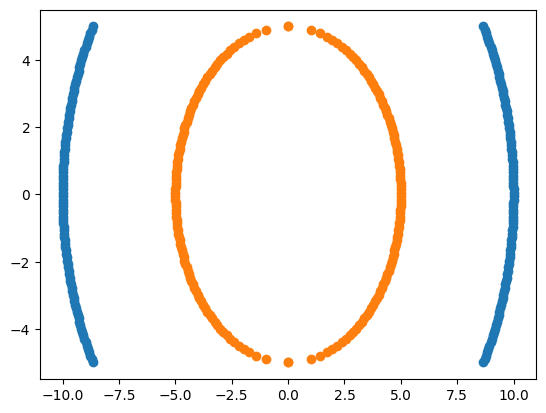

In [102]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()

In [103]:
df["x1x1"]=df["x1"]**2
df["x2x2"]=df["x2"]**2
df["x1x2"]=df["x1"]*df["x2"]

In [104]:
df.head()

,x1,x2,y,x1x1,x2x2,x1x2
0,8.660254,5.00000,0,75.000000,25.000000,43.301270
1,8.717792,4.89899,0,75.999898,24.000102,42.708375
2,8.773790,4.79798,0,76.979390,23.020610,42.096467
3,8.828277,4.69697,0,77.938476,22.061524,41.466150
4,8.881281,4.59596,0,78.877155,21.122845,40.818009


In [105]:
from plotly import express as px

In [107]:
fig=px.scatter_3d(
    df,
    x="x1",
    y="x2",
    z="x1x2",
    color="y"
)
fig.show()

In [114]:
fig=px.scatter_3d(
    df,
    x="x1x1",
    y="x2x2",
    z="x1x2",
    color="y"
)
fig.show()

In [108]:
x=df.drop("y",axis=1)
y=df["y"]

In [109]:
x.head()

,x1,x2,x1x1,x2x2,x1x2
0,8.660254,5.00000,75.000000,25.000000,43.301270
1,8.717792,4.89899,75.999898,24.000102,42.708375
2,8.773790,4.79798,76.979390,23.020610,42.096467
3,8.828277,4.69697,77.938476,22.061524,41.466150
4,8.881281,4.59596,78.877155,21.122845,40.818009


In [110]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [112]:
def check_model(x,y,kernels):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
  scaler=StandardScaler()
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)

  for kernel in kernels:
    model=SVC(kernel=kernel)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clas=classification_report(y_test,y_pred)
    print(f"model name : {kernel}")
    print(f"accuracy accuracy is : {acc}")
    print(f"confusion matrix is : {conf}")
    print(f"classifiction report is : {clas}")
    print("\n")

In [113]:
kernels=["linear","sigmoid","poly","rbf"]
check_model(x,y,kernels)

model name : linear
accuracy accuracy is : 1.0
confusion matrix is : [[35  0]
 [ 0 45]]
classifiction report is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



model name : sigmoid
accuracy accuracy is : 0.975
confusion matrix is : [[34  1]
 [ 1 44]]
classifiction report is :               precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.98      0.98      0.98        45

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



model name : poly
accuracy accuracy is : 1.0
confusion matrix is : [[35  0]
 [ 0 45]]
classifiction report is :